# Project Report
Summary
This project aims to use data on bicycle traffic in popular tourist areas of Cologne and Munich to identify patterns in the traffic, such as peak months and popular locations. The analysis will help improve tourism strategies and enhance the visitor experience by identifying areas for improvement in bicycle infrastructure and services.

Rationale
The analysis can provide insights on popular tourist locations for cycling and help visitors plan their trips accordingly.

Datasources
Datasource1: Bicycle traffic data Cologne
Metadata URL: https://mobilithek.info/offers/-2236641647976866002
Data URL: https://offenedaten-koeln.de/sites/default/files/Fahrrad_Zaehlstellen_Koeln_2016.csv
Data Type: CSV
This dataset contains the surveys of the automatic counting stations of Cologne's bicycle traffic from 2017.

Datasource2: Bike Traffic in Munich
Metadata URL: https://www.kaggle.com/datasets/lucafrance/bike-traffic-in-munich
Data URL: https://shorturl.at/vGNT9
Data Type: CSV
This dataset contains city of Munich built six stations bike traffic and weather conditions at different locations

## Install dependencies
Initially, install all required dependencies.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import folium
from IPython.display import display

## Load data
Create a pandas dataframe using the local sqlite file.

In [42]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect(r"C:\Users\HP\Desktop\2023-amse-template-main\2023-amse-template-main\project\data\cycles.sqlite")

In [43]:
import pandas as pd


# Retrieve the table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Read the tables into Pandas DataFrames
dataframes = {}  # Dictionary to store DataFrames
for table in table_names:
    table_name = table[0]
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    dataframes[table_name] = df

# Perform data analysis
"""for table_name, df in dataframes.items():
    print(f"Table: {table_name}")
    print(df.head())
    print('\n')"""

# Close the database conne

#bikes count datasets
Munich_df = dataframes['data1_table']
Koln_df = dataframes['data2_table']
#location datasets
Munich_location = dataframes['data3_table']
Koln_location = dataframes['data4_table']
#Temperature datasets
Munich_temp = dataframes['data5_table']
Koln_temp = dataframes['data6_table']

# Munich

In [44]:
Munich_df_1 = Munich_df.drop(["Grand Total"],axis=1)

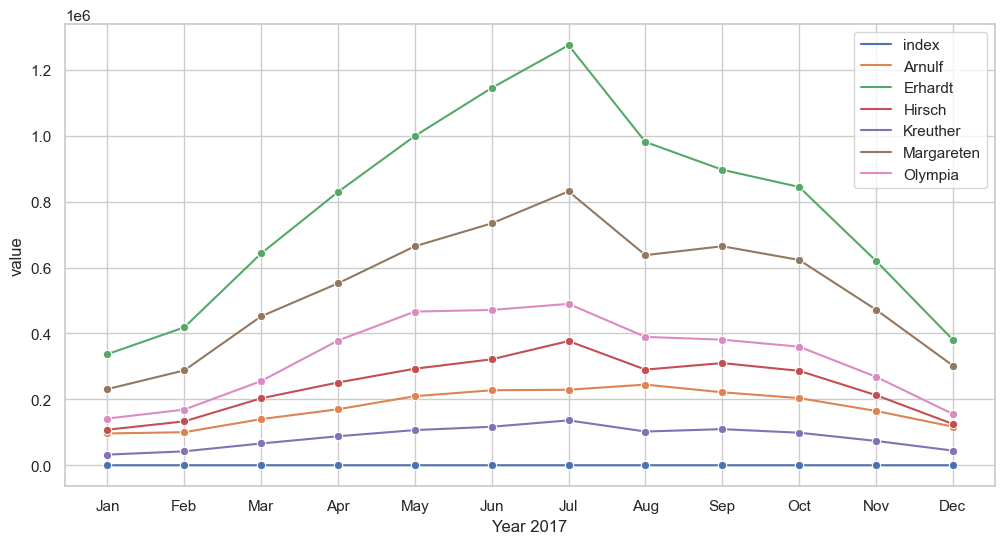

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year 2017", y='value', hue='variable', 
             data=pd.melt(Munich_df_1, ["Year 2017"]), marker = "o")
plt.legend()
plt.show()

In [46]:
Koln_df_1 = Koln_df.drop(["Grand total"],axis=1)

# Cologne 

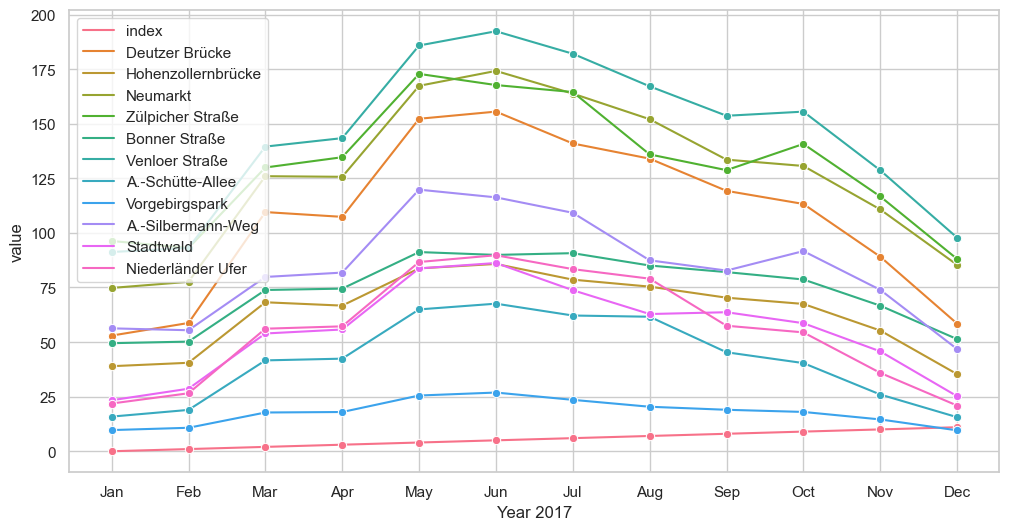

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year 2017", y='value', hue='variable', 
             data=pd.melt(Koln_df_1, ["Year 2017"]), marker = "o")
plt.legend()
plt.show()

# Comparative-analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


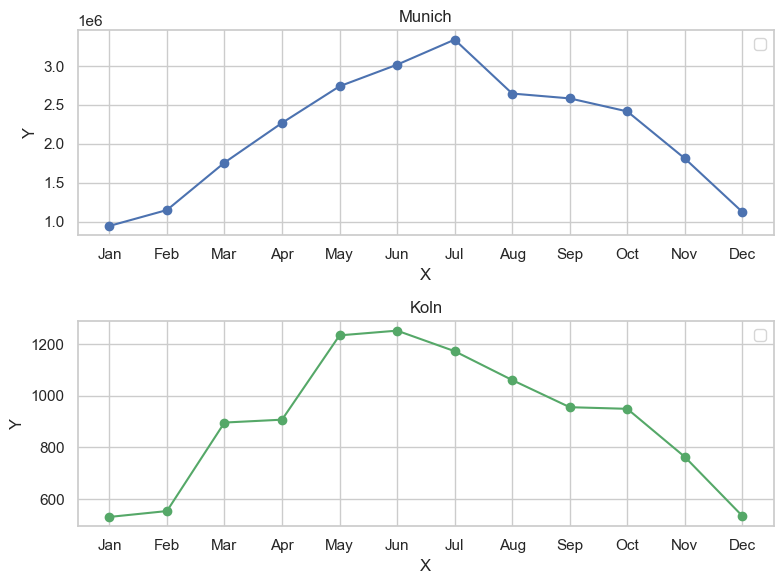

In [48]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plot on the first subplot
ax1.plot(dataframes['data1_table']["Year 2017"],dataframes['data1_table']["Grand Total"], color='b', marker = "o")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Munich')
ax1.legend()

# Plot on the second subplot
ax2.plot(dataframes['data2_table']["Year 2017"],dataframes['data2_table']["Grand total"], color='g', marker = "o")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Koln')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure with subplots
plt.show()

# Cologne Map

In [68]:
# Create a map centered on koln
latitude = 50.9375
longitude = 6.9603
map_center = [latitude, longitude]  # Replace latitude and longitude with your desired center point
folium_map = folium.Map(location=map_center, zoom_start=11)
Street_names = list(Koln_location["Streets"])
    

for i in range(Koln_location.shape[0]):
    # Create a pop-up message with street_name and Total Violations
    popup_message = f"Street Name: {Street_names[i]}"
    # Add markers to the map for each bike location
    bikes = Koln_location['Grand Total'][i]
    location_coords = [Koln_location["latitude"][i],Koln_location["longitude"][i]]
    folium.CircleMarker(
        location=location_coords,
        radius=bikes/100,  # Adjust the size scaling factor as needed
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        popup=popup_message
    ).add_to(folium_map)
display(folium_map)
# Display the map
folium_map.save('Koln_bike_map.html')  # Save the map as an HTML file

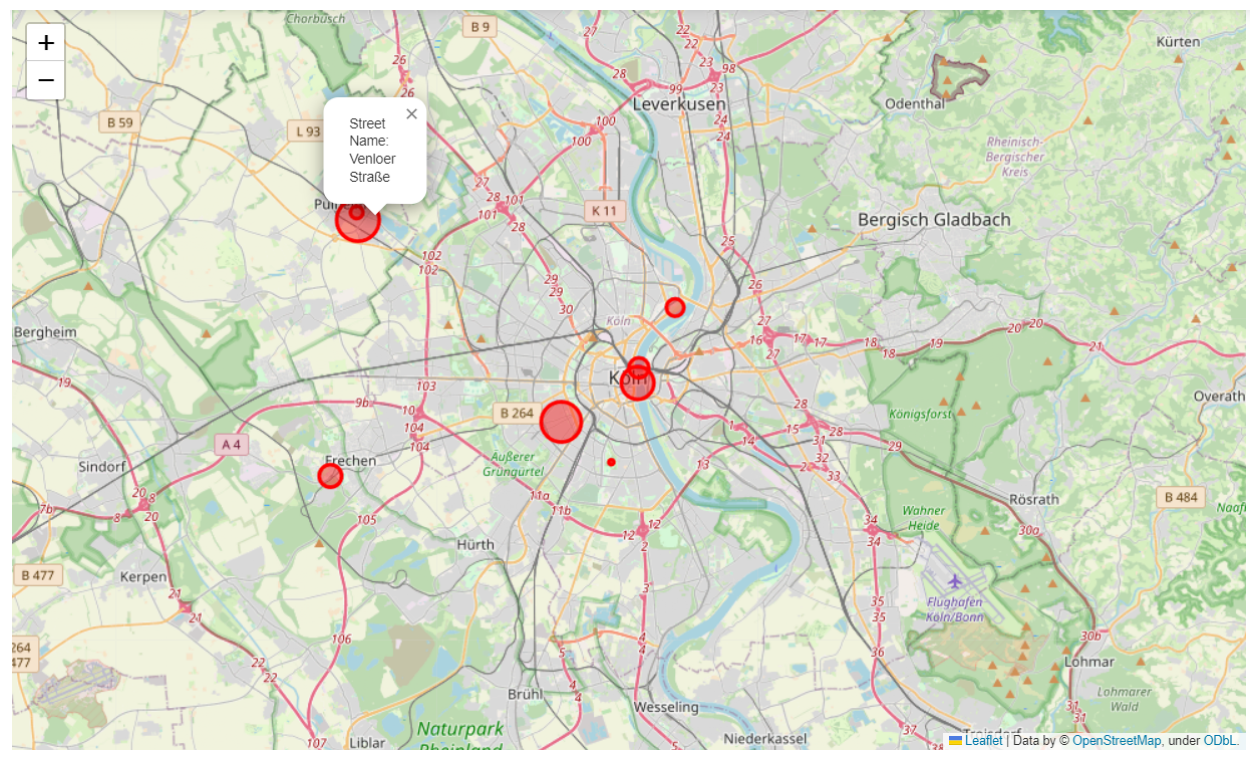

In [77]:
image_path = 'Koln_bike_map.png'
# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.figure(figsize=(16, 12))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Munich Map

In [78]:
# Create a map centered on Munich
latitude = 48.1351
longitude = 11.5820
map_center = [latitude, longitude]  # Replace latitude and longitude with your desired center point
folium_map = folium.Map(location=map_center, zoom_start=11)
Street_names = list(Munich_location["Streets"])

# Add markers to the map for each bike location
for i in range(Munich_location.shape[0]):
    # Create a pop-up message with street_name and Total Violations
    popup_message = f"Street Name: {Street_names[i]}"
    bikes = Munich_location['Grand Total'][i]
    location_coords = [Munich_location["latitude"][i],Munich_location["longitude"][i]]
    folium.CircleMarker(
        location=location_coords,
        radius=bikes/200000,  # Use the number of bikes to determine the circle size
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        popup=popup_message
    ).add_to(folium_map)
display(folium_map)
# Display the map
folium_map.save('Munich_bike_map.html')  # Save the map as an HTML file

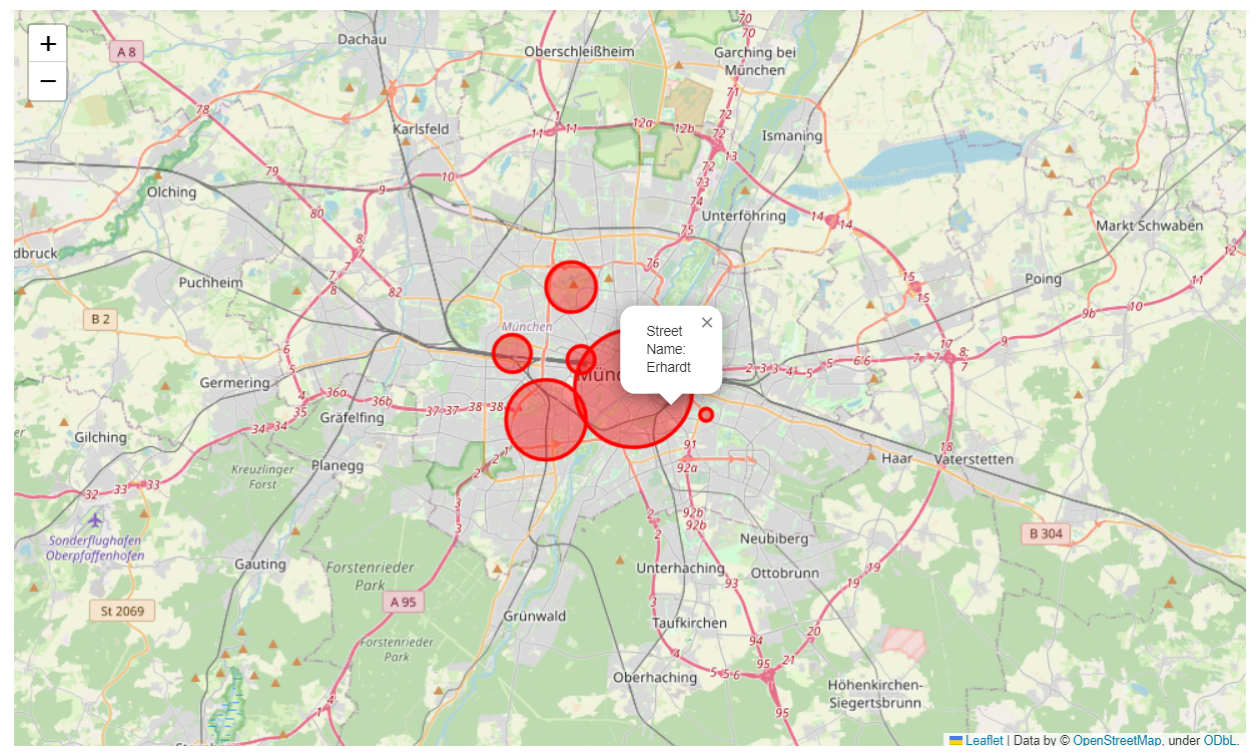

In [79]:
image_path = r'Munich_bike_map.png'
# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.figure(figsize=(16, 12))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Comparative-analysis with Weather (Munich)

In [53]:
Munich_df.drop(['Year 2017', 'Grand Total'], axis=1, inplace=True)
Munich_temp.drop(['Month', 'Grand Total'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_30980\1824269743.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


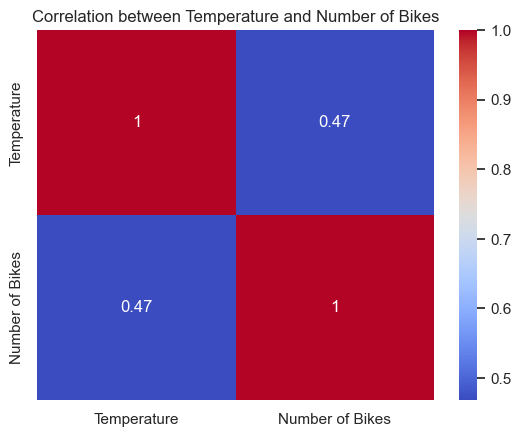

In [54]:
df = pd.concat([Munich_temp.unstack(), Munich_df.unstack()], axis=1)
df.columns = ['Temperature', 'Number of Bikes']

# Reset the index to have columns for 'Month' and 'Location'
df = df.reset_index()
df.drop(['level_1'], axis=1, inplace=True)
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a correlation plot using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation between Temperature and Number of Bikes')

# Display the plot
plt.show()

# Comparative-analysis with Weather (Cologne)

In [55]:
Koln_temp.drop(['Month'], axis=1, inplace=True)
Koln_temp.drop(12, axis=0, inplace=True)
Koln_df.drop(['Year 2017', 'Grand total'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_30980\3519720957.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


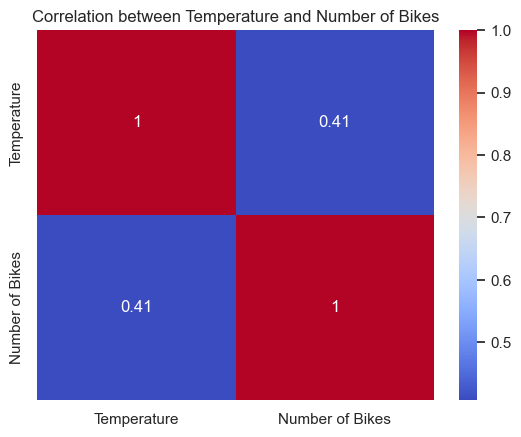

In [56]:
df = pd.concat([Koln_temp.unstack(), Koln_df.unstack()], axis=1)
df.columns = ['Temperature', 'Number of Bikes']

# Reset the index to have columns for 'Month' and 'Location'
df = df.reset_index()
df.drop(['level_1'], axis=1, inplace=True)
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a correlation plot using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation between Temperature and Number of Bikes')

# Display the plot
plt.show()